In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file
df = pd.read_csv('/content/tweets.csv')

In [3]:
#inspecting the data
df.head()

,date,text,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,hashtags,source
0,2023-04-12 20:05:08+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
1,2023-04-12 20:05:06+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
2,2023-04-12 20:05:04+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
3,2023-04-12 20:05:02+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
4,2023-04-12 20:04:58+00:00,@100xAltcoinGems $NEURONI\n\n Discover the lat...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android


In [4]:
#converting the date column into date time format
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['Week Number'] = df['date'].dt.week

In [6]:
df['Week Number'].unique()

array([15, 14, 13, 12, 11])

In [7]:
df['hashtags'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
df['hashtags'] = df['hashtags'].apply(lambda x: ','.join(map(str, x)))

In [8]:
df.head()

,date,text,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,hashtags,source,Week Number
0,2023-04-12 20:05:08+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,"AI,GPT4,506x,NeuroniAI,Neuroni",Twitter for Android,15
1,2023-04-12 20:05:06+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,"AI,GPT4,504x,NeuroniAI,Neuroni",Twitter for Android,15
2,2023-04-12 20:05:04+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,"AI,GPT4,502x,NeuroniAI,Neuroni",Twitter for Android,15
3,2023-04-12 20:05:02+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,"AI,GPT4,500x,NeuroniAI,Neuroni",Twitter for Android,15
4,2023-04-12 20:04:58+00:00,@100xAltcoinGems $NEURONI\n\n Discover the lat...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,"AI,GPT4,455x,NeuroniAI,Neuroni",Twitter for Android,15


In [9]:
#checking for counts
df['source'].value_counts()

Twitter Web App        20227
Twitter for iPhone      3113
Twitter for Android     3032
Buffer                   388
TweetDeck                341
                       ...  
tweethunter.io             1
Emplifi                    1
GiniScheduler              1
Story Chief                1
Nelio Content              1
Name: source, Length: 146, dtype: int64

df['user_description'].value_counts()

In [10]:
#checking for unique values user location
df['user_location'].unique

<bound method Series.unique of 0              Cyberspace
1              Cyberspace
2              Cyberspace
3              Cyberspace
4              Cyberspace
               ...       
28705                 NaN
28706                 NaN
28707    Toronto, Ontario
28708       Manhattan, NY
28709             Toronto
Name: user_location, Length: 28710, dtype: object>

In [11]:
#taking only the required columns
df_data = df[['text','user_location','hashtags','source']]

In [12]:
df_data.head()

,text,user_location,hashtags,source
0,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,Cyberspace,"AI,GPT4,506x,NeuroniAI,Neuroni",Twitter for Android
1,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,Cyberspace,"AI,GPT4,504x,NeuroniAI,Neuroni",Twitter for Android
2,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,Cyberspace,"AI,GPT4,502x,NeuroniAI,Neuroni",Twitter for Android
3,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,Cyberspace,"AI,GPT4,500x,NeuroniAI,Neuroni",Twitter for Android
4,@100xAltcoinGems $NEURONI\n\n Discover the lat...,Cyberspace,"AI,GPT4,455x,NeuroniAI,Neuroni",Twitter for Android


In [13]:
#inspecting the text column
df_data['text'][10]

'AI Chatbots Can Diagnose Medical Conditions at Home. How Good Are They? (Better than you think!) #medicine #digitalhealth #LLMs #ChatGPT #GPT3 #GPT4  https://t.co/4BtMmfeyVQ'

In [14]:
#Data cleaning 
df_data['text'] = df_data['text'].str.replace('(\@\w+.*?)',"")
df_data['text'] = df_data['text'].str.replace('(\#\w+.*?)',"")
df_data['text'] = df_data['text'].str.replace('(\$\w+.*?)',"")
df_data['text'] = df_data['text'].str.replace('º',"")
# df_data['text'] = df_data['text'].str.replace(',',"")
df_data['text'] = df_data['text'].apply(lambda x: str(x).replace('\n',''))
df_data['text'] = df_data['text'].apply(lambda x: str(x).replace('\d',''))
#df_data['text'] = df_data['text'].apply(lambda x: x.replace(u'\u2122',u' '))
#df_data['text'] = df_data['text'].apply(lambda x: x.replace('\u200a',' '))
df_data['text'] = df_data['text'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df_data['text'] = df_data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df_data['text'] = df_data['text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
df_data['text'] = df_data['text'].apply(lambda x: re.split('www.*', str(x))[0])
df_data['text'] = df_data['text'].str.findall('\w{4,}').str.join(' ')
#df_data['text'] = df_data['text'].str.findall('\w{,5}').str.join(' ')
df_data['text'] = df_data['text'].apply(lambda x: re.sub(r'\w*\d\w*', '', x).strip())

In [15]:
df_data['text'][10]

'Chatbots Diagnose Medical Conditions Home Good They Better than think'

In [16]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_data['text'] = df_data['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df_data['text'][10]

'chatbots diagnose medical conditions home good they better think'

In [18]:
#libraries for wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

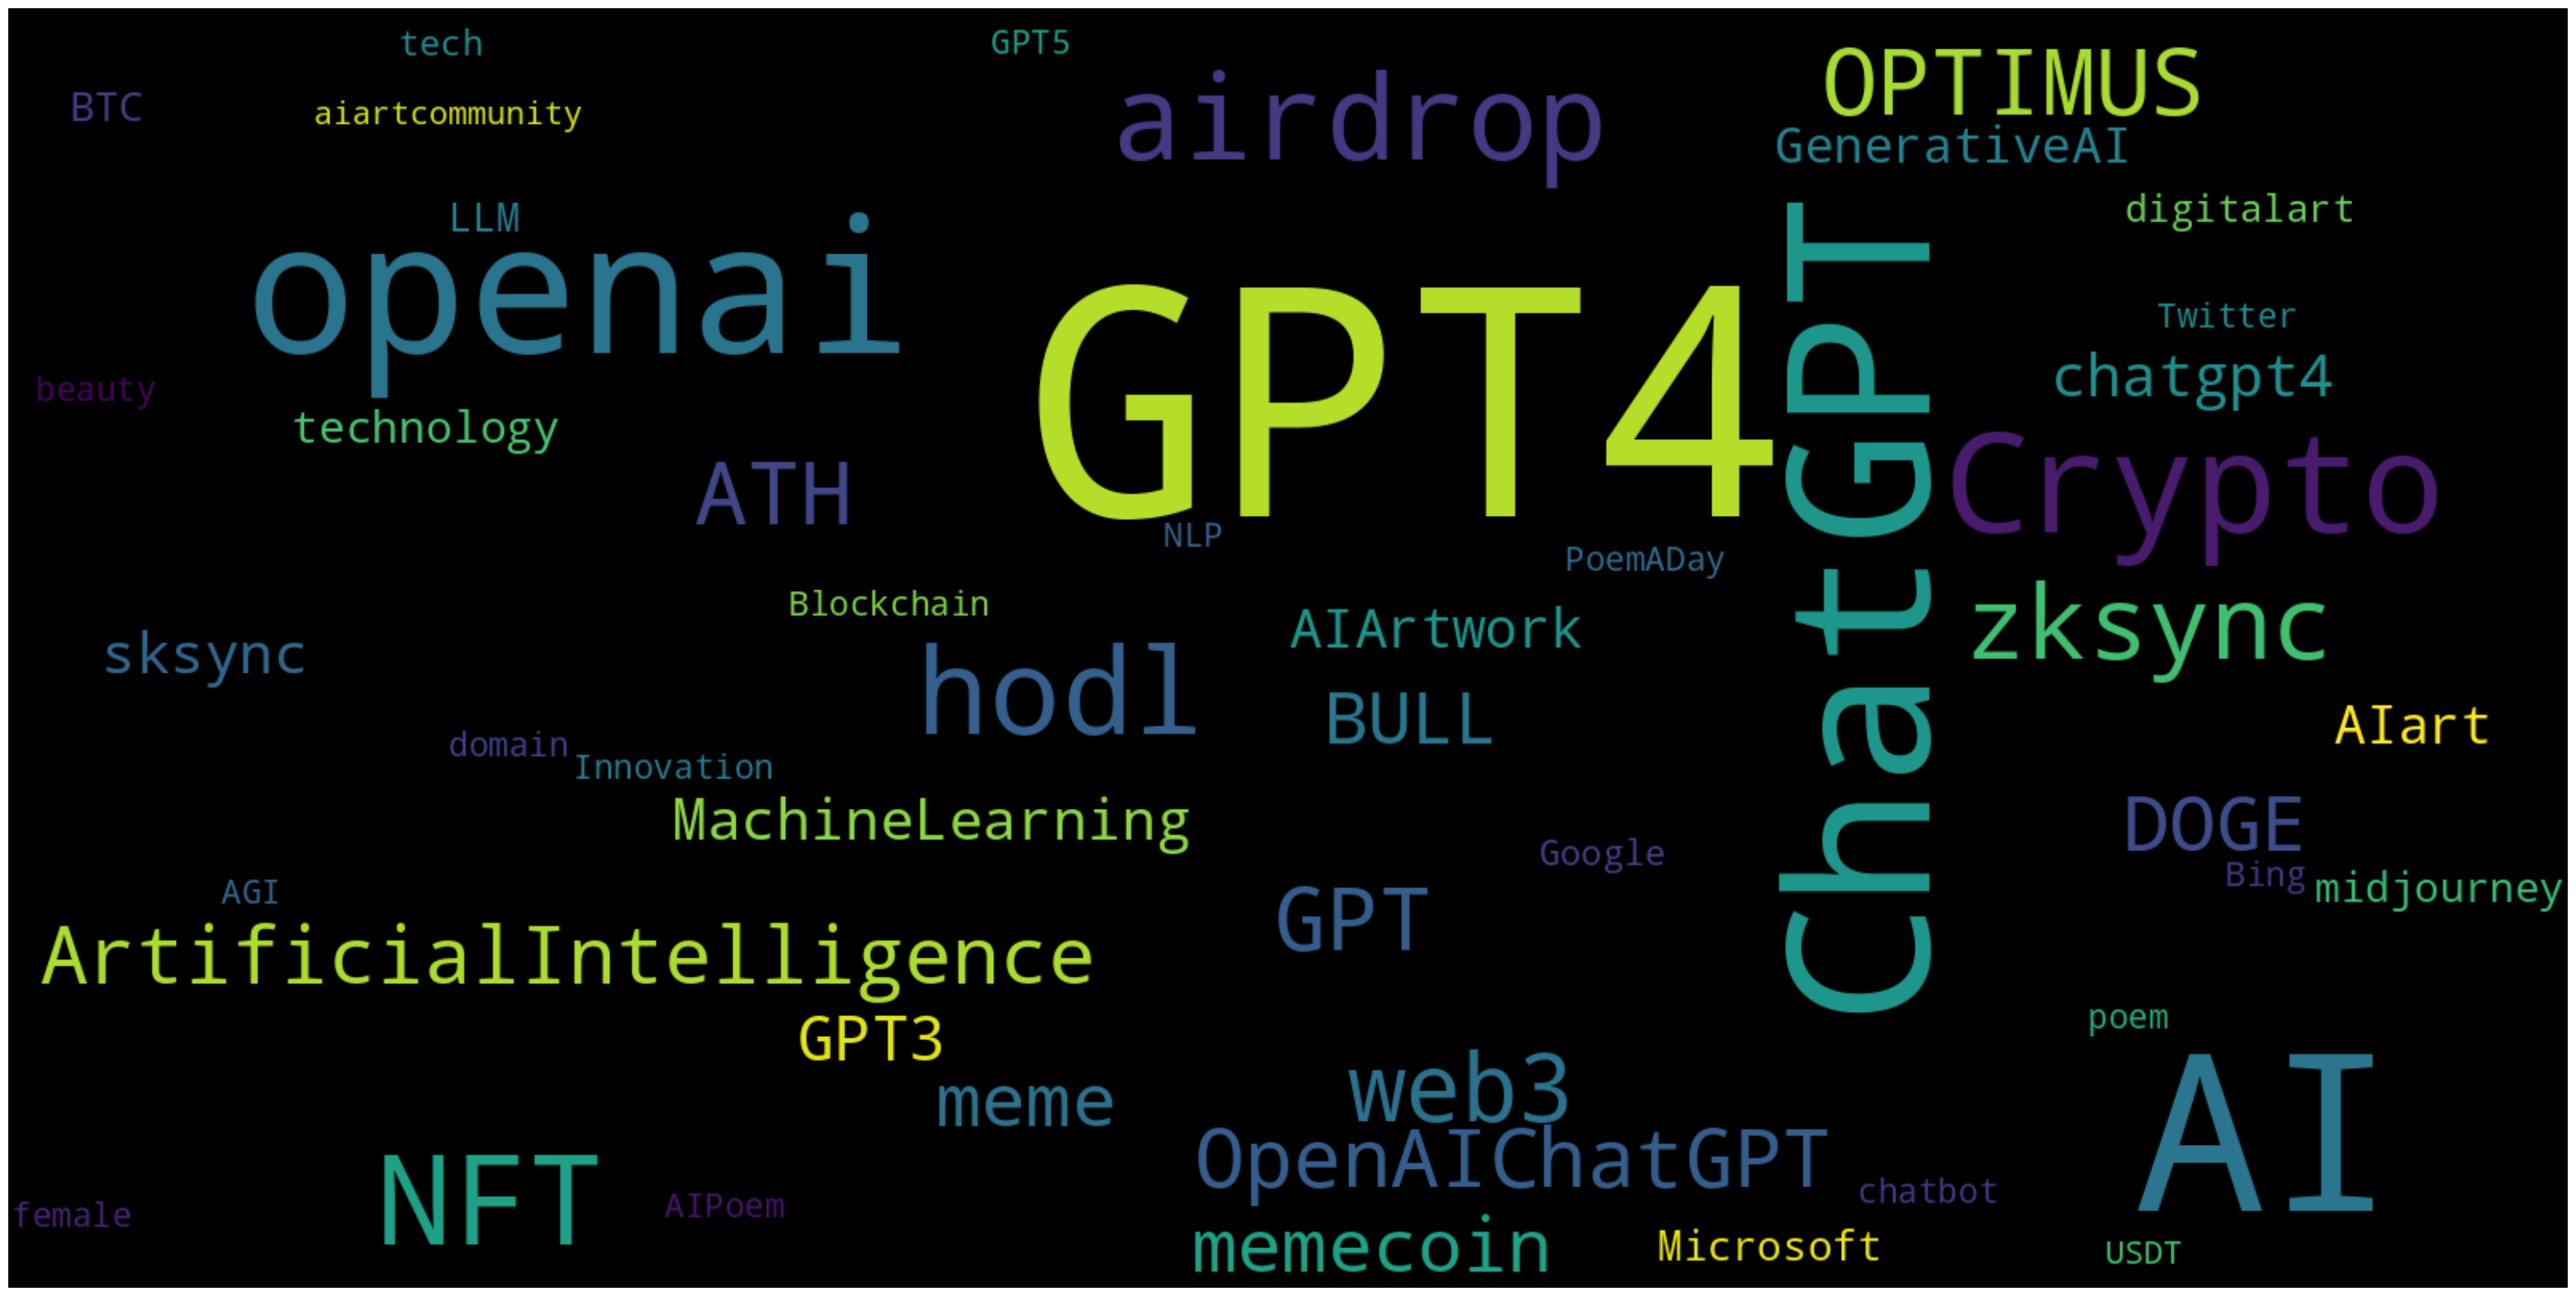

In [19]:
#worcloud plot for hastag
string = pd.Series(df_data['hashtags']).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

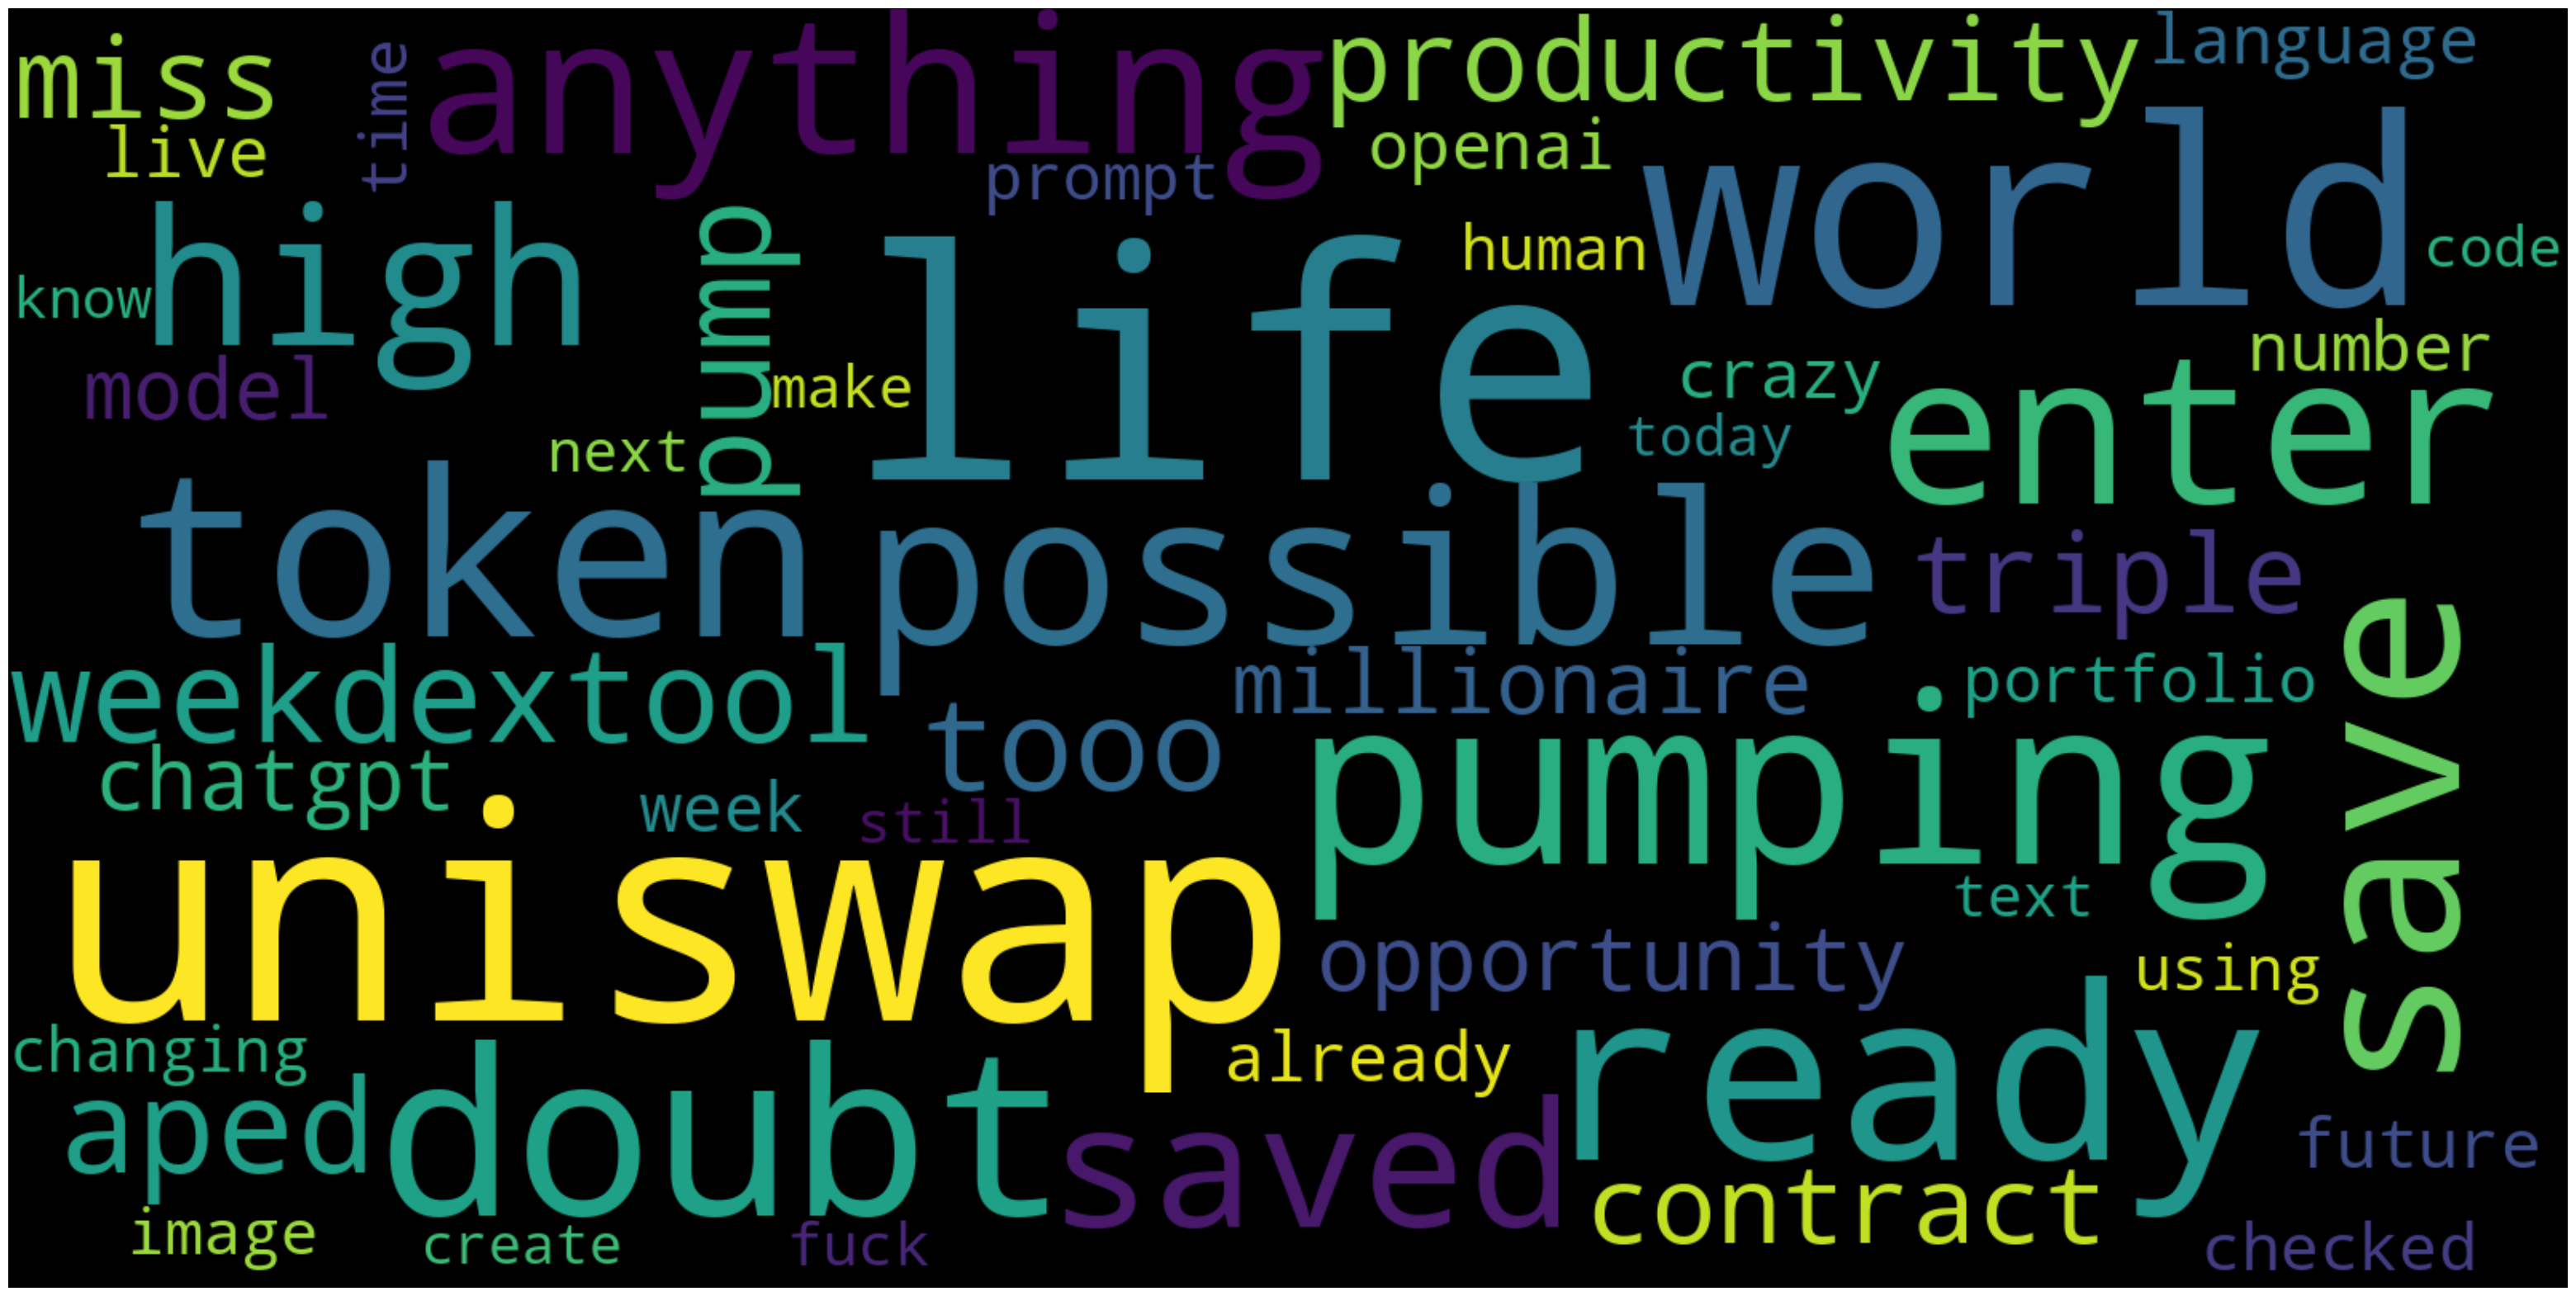

In [20]:
#wordcloud for text column
string = pd.Series(df_data['text']).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
# import numpy as np
# from PIL import Image
# mask = np.array(Image.open('./Twitter_Logo_new.jpg'))
# string = pd.Series(df_data['hashtags']).str.cat(sep=' ')
# wordcloud = WordCloud(width=1600, mask =   mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False).generate(string)
# f = plt.figure(figsize=(50,50))
# f.add_subplot(1,2, 1)
# plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.title('Original Image', size=40)
# plt.axis("off")
# f.add_subplot(1,2, 2)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.title('Generated Word Cloud', size=40)
# plt.axis("off")
# plt.show()

In [22]:
#checking counts for location column
loc = df_data['user_location'].value_counts()

In [23]:
loc

UK                             295
India                          284
United States                  257
Imoutoland                     185
St Petersburg, FL              175
                              ... 
Cryptoverse                      1
GlenGilmore@GlenGilmore.com      1
Самара, Россия                   1
Rotterdam, Nederland             1
METAVERSE @METZ                  1
Name: user_location, Length: 3440, dtype: int64

In [24]:
#libraries for bert
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [25]:
df_text = df_data['text']

In [26]:
df_text

0        join official telegram group stay tuned latest...
1        invest part project reserve total supply token...
2        ready neuroni available free features phase ro...
3        want neuroni telegram group choose premium sub...
4        discover latest neuroni functions including mo...
                               ...                        
28705                                                 also
28706    much energy take train powerful language model...
28707         looks like video dominating polls what think
28708    perfect storm brewing upcoming product launch ...
28709                          horizon matters think start
Name: text, Length: 28710, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#Create a Gaussian Classifier
tfidf_vect = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')
X_train_tfidf = tfidf_vect.fit_transform(df_text)
feature_names = np.array(tfidf_vect.get_feature_names_out())
X_test_tfidf = tfidf_vect.transform(df_text)
sum_words = X_test_tfidf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
df_sub = df.head(10)
df_sub['Frequency'] = df_sub['Frequency'].apply(np.ceil)
df_sub
#histdata = pd.Dataframe(histdata)

,Word,Frequency
0,life,1416.0
1,uniswap,1174.0
2,possible,1023.0
3,just,986.0
4,world,948.0
5,ready,922.0
6,enter,903.0
7,pumping,817.0
8,productivity,760.0
9,miss,754.0


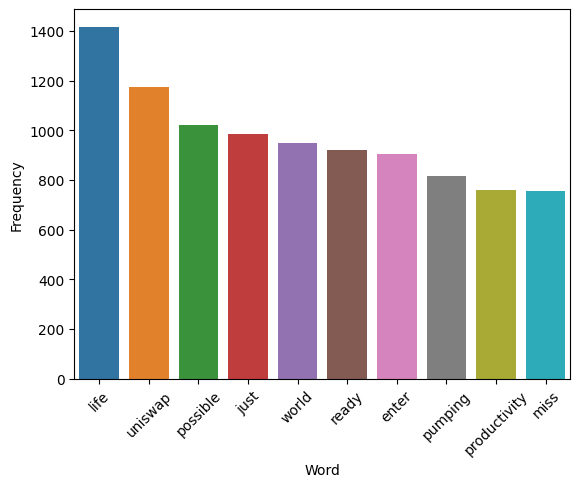

In [28]:
#word frquency plot
import seaborn as sns
ax = sns.barplot(data=df_sub,x="Word",y="Frequency",)
ax.tick_params(axis='x', rotation=45)

In [29]:
#importing BERT topic
from bertopic import BERTopic

In [30]:
#topic modelling
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)

In [31]:
topics, probs = topic_model.fit_transform(df_text)

Batches:   0%|          | 0/898 [00:00<?, ?it/s]

2023-05-10 00:36:19,605 - BERTopic - Transformed documents to Embeddings
2023-05-10 00:37:52,098 - BERTopic - Reduced dimensionality
2023-05-10 00:42:43,179 - BERTopic - Clustered reduced embeddings


In [32]:
#frequency of the topics
freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

304


,Topic,Count,Name
0,-1,8109,-1_like_chatgpt_time_human
1,0,1840,0_tooo_pumps_have_aped
2,1,1623,1_millionaire_contract_opportunity_miss
3,2,1316,2_life_weekdextool_saved_save
4,3,1295,3_triple_productivity_enter_ready
...,...,...,...
299,298,10,298_anxiety_awakeninganxiety_feeling_syndrome
300,299,10,299_flawed_ways_impressive_poorest
301,300,10,300_artists_empowering_creative_steering
302,301,10,301_maybe_parsons_dope_better


In [33]:
df_data['text'][10]

'chatbots diagnose medical conditions home good they better think'

In [34]:
#topic modelling visualisation
topic_model.visualize_barchart(top_n_topics=5,n_words=9,height=250,width=250)

In [35]:
df.head()

,Word,Frequency
0,life,1415.119451
1,uniswap,1173.172125
2,possible,1022.062633
3,just,985.952083
4,world,947.676917
